Source: https://github.com/root-project/student-course/tree/main

In [ ]:
import ROOT
df = ROOT.RDataFrame('myDataset','collections_dataset.root')

In [ ]:
# inspect the Dataframe
# df.Display().Print() 

In [ ]:
df = df.Define("good_pt", "sqrt(px*px + py*py)[E>100]")

`sqrt(px*px + py*py)[E>100]`:
- `px`, `py` and `E` are the columns, the elements of those columns are `RVec`s

- Operations on `RVec`s, such as sum, product, sqrt, preserve the dimensionality of the array

- `[E>100]` selects the elements of the array that satisfy the condition

- `E > 100`: boolean expressions on `RVec`s such as `E > 100` return a mask, that is an array with information which values pass the selection (e.g. `[0, 1, 0, 0]` if only the second element satisfies the condition)

In [ ]:
npy_dict = df.AsNumpy(["E","good_pt"])
print(f"Numbers of run {df.GetNRuns()}") # trigger the event loop
for row, vec in enumerate(npy_dict["E"]):
    print(f"\nRow {row} contains:\n{vec}, {len(vec)}")

In [ ]:
for row, vec in enumerate(npy_dict["good_pt"]):
    print(f"\nRow {row} contains:\n{vec} , len = {len(vec)}")
print(f"Numbers of run {df.GetNRuns()}") # trigger the event loop

In [ ]:
c = ROOT.TCanvas()
h = df.Histo1D(("pt", "pt", 16, 0, 4), "good_pt")
h.Draw()
c.Draw()

# Using C++ functions in python

In [11]:
import ROOT

In [12]:

%%cpp
float asfloat(unsigned long int entrynumber)
{
    return entrynumber;
}




In [13]:
ROOT.gInterpreter.Declare(
"""
float square(float x)
{
return x*x;
}
"""
)

True

In [14]:
df = ROOT.RDataFrame(100) # create dataframe with 100 entries
df= df.Define("a", "asfloat(rdfentry_)")
df = df.Define("b", "square(a)")

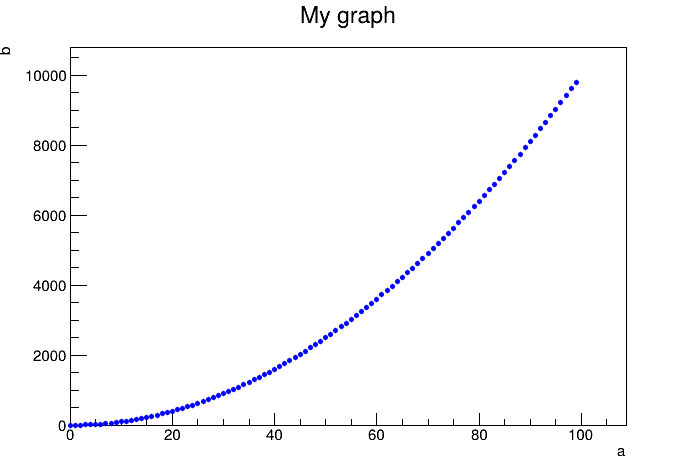

In [15]:
# Show the two columns created in a graph
c = ROOT.TCanvas()
graph = df.Graph("a","b")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetTitle("My graph")
graph.Draw("AP")
c.Draw()

# Using python functions in RDataframe


In [1]:
import ROOT

@ROOT.Numba.Declare(['float'],'float')
def square(x):
    return x*x

In [7]:
@ROOT.Numba.Declare(['unsigned long'], 'float')
def asfloat(entry):
    return entry*1.0

In [9]:
df = ROOT.RDataFrame(100) # create dataframe with 100 entries
df= df.Define("a", "Numba::asfloat(rdfentry_)")
df = df.Define("b", "Numba::square(a)")

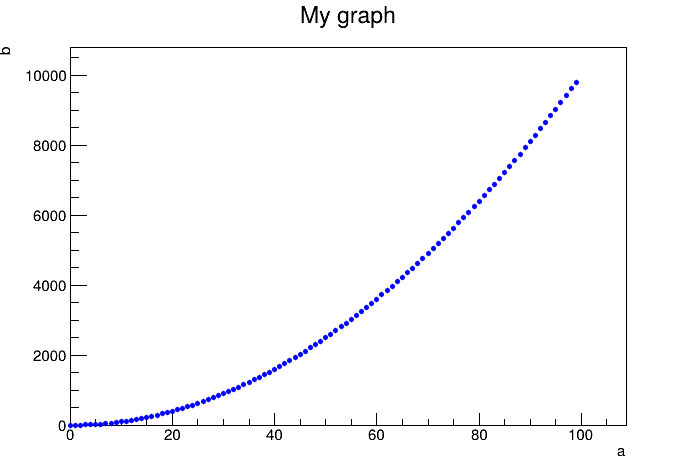

In [10]:
# Show the two columns created in a graph
c = ROOT.TCanvas()
graph = df.Graph("a","b")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetTitle("My graph")
graph.Draw("AP")
c.Draw()